https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/data?select=spotify_songs.csv

In [42]:
import numpy as np
import pandas as pd
import string
from bs4 import BeautifulSoup
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,Normalizer
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,Conv1D,MaxPool1D,Flatten,Dropout,Dense
from tensorflow.keras.models import Sequential

In [43]:
data=pd.read_csv("spotify_songs.csv")
data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [45]:
# these columns don't have any useful information,so we can drop them.
data.drop(["track_id","track_album_id","playlist_id","track_album_release_date"],axis=1,inplace=True)


In [46]:
# samples with null values. As you can see all of features of these samples have null values. so we should drop them.
data[data.isnull()]

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# drop null values.
data.dropna(inplace=True)

In [48]:
# drop duplicated rows
data.drop_duplicates(keep="first",inplace=True)
data.drop_duplicates(subset=["track_name"],inplace=True)
data.shape

(23449, 19)

# Splitting dataset into categorical and numerical

# categorical dataset

In [49]:
categorical_data=data.select_dtypes("object")
categorical_data

,track_name,track_artist,track_album_name,playlist_name,playlist_genre,playlist_subgenre
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,pop,dance pop
1,Memories - Dillon Francis Remix,Maroon 5,Memories (Dillon Francis Remix),Pop Remix,pop,dance pop
2,All the Time - Don Diablo Remix,Zara Larsson,All the Time (Don Diablo Remix),Pop Remix,pop,dance pop
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,Call You Mine - The Remixes,Pop Remix,pop,dance pop
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,Someone You Loved (Future Humans Remix),Pop Remix,pop,dance pop
...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,edm,progressive electro house
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,Closer Remixed,♥ EDM LOVE 2020,edm,progressive electro house
32830,Sweet Surrender - Radio Edit,Starkillers,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,edm,progressive electro house
32831,Only For You - Maor Levi Remix,Mat Zo,Only For You (Remixes),♥ EDM LOVE 2020,edm,progressive electro house


In [50]:
# merging columns

categorical_data["song_description"]=categorical_data["track_name"]+categorical_data["track_album_name"]+categorical_data["playlist_name"]+categorical_data["playlist_subgenre"]

categorical_data["description"]=categorical_data["track_artist"]+" "+categorical_data["song_description"]

In [51]:
categorical_data.drop(["track_name","track_album_name","playlist_subgenre","playlist_name","song_description","track_artist"],axis=1,inplace=True)

In [52]:
categorical_data.rename(columns={"playlist_genre":"labels"},inplace=True)
categorical_data

,labels,description
0,pop,Ed Sheeran I Don't Care (with Justin Bieber) -...
1,pop,Maroon 5 Memories - Dillon Francis RemixMemori...
2,pop,Zara Larsson All the Time - Don Diablo RemixAl...
3,pop,The Chainsmokers Call You Mine - Keanu Silva R...
4,pop,Lewis Capaldi Someone You Loved - Future Human...
...,...,...
32828,edm,Lush & Simon City Of Lights - Official Radio E...
32829,edm,Tegan and Sara Closer - Sultan & Ned Shepard R...
32830,edm,Starkillers Sweet Surrender - Radio EditSweet ...
32831,edm,Mat Zo Only For You - Maor Levi RemixOnly For ...


In [53]:
def clean(text):
    #HTML to text format
    soup=BeautifulSoup(text)
    text=soup.getText()
    return text

In [54]:
categorical_data["description"]=categorical_data["description"].apply(clean)

C:\Users\NikAndish\AppData\Local\Temp\ipykernel_3000\2865246774.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(text)


In [55]:
# encoding labels
label_encoder=LabelEncoder()
categorical_data["labels"]=label_encoder.fit_transform(categorical_data["labels"])

In [56]:
# extract labels 
y=categorical_data["labels"]
print(f"unique values of labels :{y.unique()}")

unique values of labels :[2 4 5 1 3 0]


In [57]:
# labels one hot encoding
print(f"sample number 1 has this lable->  {y[0]}")
y=np.asarray(tf.keras.utils.to_categorical(y))
print(f"after OHE: {y[0]}")

sample number 1 has this lable->  2
after OHE: [0. 0. 1. 0. 0. 0.]


In [58]:
# tokenizing texts
tokenizer=Tokenizer()
tokenizer.fit_on_texts(categorical_data['description'])

In [59]:
# number of unique words
vocab_len=len(tokenizer.word_index) + 1
vocab_len

47778

In [60]:
# transform each text (per row) to a list of numbers (sequence of numbers)

encoded_texts=tokenizer.texts_to_sequences(categorical_data['description'])

In [61]:
# picking up the longest encoded sequence 
length_list=[]
for seq in encoded_texts:
  length_list.append(len(seq))

max_len=max(length_list)

In [62]:
max_len

58

In [63]:
# padding 
X=pad_sequences(encoded_texts,maxlen=max_len,padding="pre")


In [64]:
# 23449 samples and 58 features

X.shape

(23449, 58)

In [65]:
categorical_data=pd.DataFrame(X)
categorical_data_mat=categorical_data.to_numpy()

# Numerical dataset

In [66]:
numerical_data = data.select_dtypes(["float64","int64"])

In [67]:
numerical_data["duration_ms"]=numerical_data["duration_ms"]/60000

In [68]:
# Normalizing and Scaling
scaler=StandardScaler()
numerical_data=scaler.fit_transform(numerical_data)
numerical_data=pd.DataFrame(numerical_data)
norm=Normalizer(norm="l2")
numerical_data=norm.fit_transform(numerical_data)

In [69]:
numerical_data=pd.DataFrame(numerical_data)
numerical_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000
mean,0.009141,0.013048,0.017732,-0.000146,0.024645,0.003371,-0.019350,-0.022565,-0.030964,-0.017370,0.007478,-0.007053,-0.012472
std,0.298749,0.281817,0.270367,0.304008,0.258867,0.316236,0.266439,0.262023,0.231633,0.258471,0.293647,0.284292,0.260929
min,-0.736551,-0.796255,-0.777393,-0.719985,-0.914120,-0.714491,-0.471250,-0.517032,-0.279917,-0.515800,-0.795081,-0.762611,-0.753423
25%,-0.216635,-0.188248,-0.196455,-0.282069,-0.142022,-0.330749,-0.200285,-0.213234,-0.137669,-0.194291,-0.228201,-0.241680,-0.196809
50%,0.037238,0.035365,0.040803,0.039426,0.057705,0.188754,-0.122106,-0.130098,-0.115346,-0.111253,0.002369,0.011779,-0.050020
75%,0.239850,0.223998,0.243138,0.252183,0.220126,0.280777,0.083105,0.115439,-0.083520,0.113876,0.238762,0.146407,0.138333
max,0.738870,0.745852,0.696681,0.747516,0.679523,0.615844,0.937662,0.829024,0.894179,0.923020,0.739478,0.843832,0.910237


In [70]:
numerical_data_mat=numerical_data.to_numpy()
numerical_data_mat.shape

(23449, 13)

In [71]:
final_data=np.concatenate([numerical_data_mat,categorical_data_mat],axis=1)

In [72]:
X=final_data


In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [74]:
x_train.shape

(17586, 71)

In [75]:
x_test.shape


(5863, 71)

In [76]:
# Model architecture
model=Sequential()

model.add(Embedding(input_dim=vocab_len,output_dim=50,input_length=x_train.shape[1]))
model.add(Conv1D(filters=64,kernel_size=4,padding="same",activation="relu"))
model.add(MaxPool1D())
model.add(Flatten())
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=6,activation="softmax",name="output"))


In [77]:
 model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 71, 50)            2388900   
                                                                 
 conv1d_1 (Conv1D)           (None, 71, 64)            12864     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 35, 64)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2240)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                71712     
                                                                 
 output (Dense)              (None, 6)                 198       
                                                      

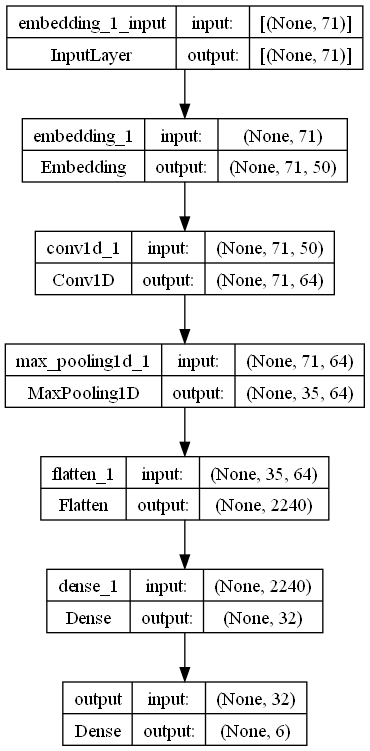

In [78]:
tf.keras.utils.plot_model(model,"m.png",show_shapes=True)

# Model training

In [79]:
# compiling Model
optimizer=tf.optimizers.Adam(learning_rate=0.001)
loss=tf.losses.CategoricalCrossentropy()
metric=tf.metrics.CategoricalAccuracy()
model.compile(optimizer=optimizer,loss=loss,metrics=metric)


In [80]:
# fittind model
model.fit(x_train,y_train,epochs=5,batch_size=50,validation_split=0.2,verbose=2)

Epoch 1/5
282/282 - 12s - loss: 0.5555 - categorical_accuracy: 0.8003 - val_loss: 0.0223 - val_categorical_accuracy: 0.9937 - 12s/epoch - 43ms/step
Epoch 2/5
282/282 - 11s - loss: 0.0057 - categorical_accuracy: 0.9994 - val_loss: 0.0100 - val_categorical_accuracy: 0.9977 - 11s/epoch - 38ms/step
Epoch 3/5
282/282 - 11s - loss: 7.8398e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0083 - val_categorical_accuracy: 0.9977 - 11s/epoch - 38ms/step
Epoch 4/5
282/282 - 10s - loss: 3.7246e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0079 - val_categorical_accuracy: 0.9977 - 10s/epoch - 37ms/step
Epoch 5/5
282/282 - 10s - loss: 2.2213e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0078 - val_categorical_accuracy: 0.9977 - 10s/epoch - 36ms/step


# Evaluating model

In [81]:
model.evaluate(x_test,y_test)

184/184 [==============================] - 1s 4ms/step - loss: 0.0076 - categorical_accuracy: 0.9983


[0.007582336198538542, 0.9982944130897522]